In [17]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [41]:
x_train = np.linspace(-3, 3, num=50)
y_train = np.cos(x_train) + np.random.normal(0, 0.1, size=50)

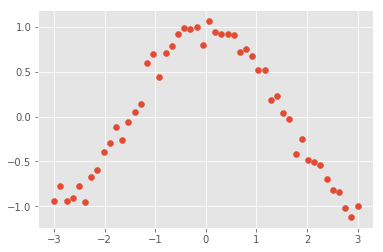

In [42]:
x_train = x_train.astype(np.float32).reshape((50, 1))
y_train = y_train.astype(np.float32).reshape((50, 1))
plt.scatter(x_train,y_train)

In [9]:
import tensorflow as tf
from edward.models import Normal

W_0 = Normal(loc=tf.zeros([1, 2]), scale=tf.ones([1, 2]))
W_1 = Normal(loc=tf.zeros([2, 1]), scale=tf.ones([2, 1]))
b_0 = Normal(loc=tf.zeros(2), scale=tf.ones(2))
b_1 = Normal(loc=tf.zeros(1), scale=tf.ones(1))

x = x_train
y = Normal(loc=tf.matmul(tf.tanh(tf.matmul(x, W_0) + b_0), W_1) + b_1,
           scale=0.1)

In [11]:
qW_0 = Normal(loc=tf.Variable(tf.zeros([1, 2])),
              scale=tf.nn.softplus(tf.Variable(tf.zeros([1, 2]))))
qW_1 = Normal(loc=tf.Variable(tf.zeros([2, 1])),
              scale=tf.nn.softplus(tf.Variable(tf.zeros([2, 1]))))
qb_0 = Normal(loc=tf.Variable(tf.zeros(2)),
              scale=tf.nn.softplus(tf.Variable(tf.zeros(2))))
qb_1 = Normal(loc=tf.Variable(tf.zeros(1)),
              scale=tf.nn.softplus(tf.Variable(tf.zeros(1))))

In [12]:
import edward as ed

inference = ed.KLqp({W_0: qW_0, b_0: qb_0,
                     W_1: qW_1, b_1: qb_1}, data={y: y_train})
inference.run(n_iter=1000)

1000/1000 [100%] ██████████████████████████████ Elapsed: 6s | Loss: 4.196
